# Discovering Fuzzy Periodic Frequent Pattern in Big Data Using FPFPMiner Algorithm

In this tutorial, we will discuss the first approach to find Fuzzy Periodic Frequent Pattern in big data using FPFPMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Fuzzy Periodic Frequent Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing FPFPMiner on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the FPFPMiner algorithm

In [1]:
from PAMI.fuzzyPeriodicFrequentPattern.basic import FPFPMiner  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv'
periodCount=1000
minimumSupportCount=1000  #Users can also specify this constraint between 0 to 1.

seperator='\t'

#### Step 3: Execute the FPFPMiner algorithm

In [3]:
obj = alg.FPFPMiner(iFile=inputFile, minSup=minimumSupportCount,period=periodCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

ValueError: invalid literal for int() with base 10: '25.L'

#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [ ]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [ ]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [ ]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

##### Step 5.2: Runtime consumed by the mining algorithm

In [ ]:
print('Runtime: ' + str(obj.getRuntime()))

##### Step 5.3: Total Memory consumed by the mining algorithm

In [ ]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

# Advanced Tutorial on Implementing FPFPMiner Algorithm

In this tutorial, we will discuss the second approach to find Fuzzy Periodic Frequent Pattern in big data using FPFPMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Fuzzy Periodic Frequent Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the FPFPMiner algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the FPFPMiner algorithm and pandas data frame

In [1]:
from PAMI.fuzzyPeriodicFrequentPattern.basic import FPFPMiner  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'fuzzyTemporal_T10I4D100K.csv'

minimumSupportCountList=[800,1000,1200,1400,1800]  #Users can also specify this constraint between 0 to 1.
periodCount=1000
seperator=' '
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FPFPMiner algorithm

#### Step 3: Execute the FPFPMiner algorithm using a for loop

In [3]:
algorithm = 'FPFPMiner'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FPFPMiner(iFile=inputFile, minSup=minSupCount,period=periodCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


In [4]:
print(result)

   algorithm  minSup  patterns     runtime     memory
0  FPFPMiner     800       461  432.156967  438480896
1  FPFPMiner    1000       382  333.833456  433057792
2  FPFPMiner    1200       318  262.252220  426692608
3  FPFPMiner    1400       259  194.049791  418111488
4  FPFPMiner    1800       174  105.433530  397541376


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

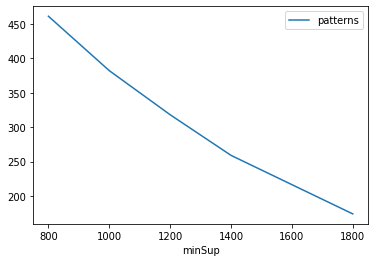

Graph for No Of Patterns is successfully generated!


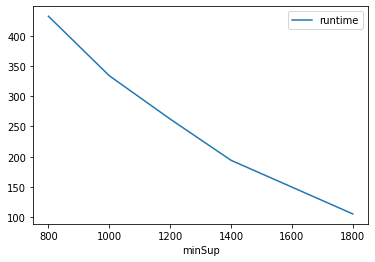

Graph for Runtime taken is successfully generated!


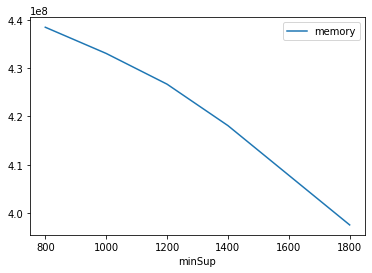

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
